<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/GD%2C%20ID3%2C%20SVM%20-%20Project%202/CSCI6364_Project_2_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project 2**- Task 1 Linear Regression (15pts):

In this exercise, you will implement a linear regression model to predict the house price. For this
exercises use the dataset from the link below. Only use a single feature for you regression model and
explain your reasons for selecting that feature. Please explain the data setting and experimental setup
similar to Project 1.
The key components of your linear regression model are the cost function and gradient decent method
to update the weights.

https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression/data


# 1. Task Setup and sample splitting

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/DATA_STORE/kc_house_data.csv')


In [5]:
df_norm = (df - df.mean()) / df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [6]:
train, test = train_test_split(df_norm, test_size=0.2, random_state=69)

train, val = train_test_split(train, test_size=0.2, random_state=69)

#check the shape of the data
print(train.shape)
print(val.shape)
print(test.shape)

(13832, 21)
(3458, 21)
(4323, 21)


# 2. Feature selection

One feature will be selected based on the highest correlation among the variables to the target which is price.

In [7]:
#calculate and sort highest correlation wrt price
corr = train.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.696098
grade            0.663449
sqft_above       0.599814
sqft_living15    0.587558
bathrooms        0.512786
view             0.384801
bedrooms         0.321161
lat              0.318558
sqft_basement    0.311594
floors           0.268417
waterfront       0.254408
yr_renovated     0.115188
sqft_lot         0.085132
sqft_lot15       0.078625
yr_built         0.051809
condition        0.032224
long             0.020111
id              -0.014780
zipcode         -0.047377
Name: price, dtype: float64

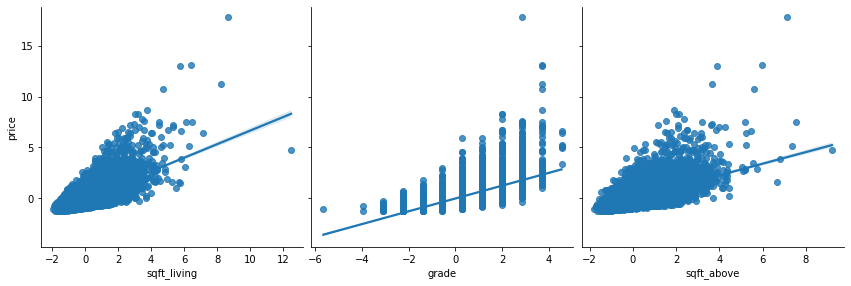

In [8]:
#for this task, i am selecting sqft_living as my primary feature
#pairplot of sqft_living, grade, sqft_above and price

sns.pairplot(train, x_vars=['sqft_living', 'grade', 'sqft_above'], y_vars='price', height=4, aspect=1, kind='reg')



#3. Implementing Gradient Descent 



task: minimize the cost function on each pass:

\begin{align} \mathbf{J_{cost}} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y} )^2.
\end{align}

---


to minimize the cost, weights will need to be updated by finding the gradient with respect to m and b.



In [9]:
X = df_norm['sqft_living']
y = df_norm['price']

#convert to numpy array
X = np.array(X)
y = np.array(y)

In [17]:
m = 0
c = 0
learning_rate = .01
n_iter = 5000
#mean squared error if y is a vector
def error_calc(X,y,m,c):
    error = 0
    n = len(X)
    for i in range(n):
        y_hat = m*X[i] + c
        error += (y_hat - y[i])**2
    return error/n
    

def calculate_gradient(X,y,m,c):
    n = len(X)
    c_grad = 0
    m_grad = 0
    for i in range(n):
        y_hat = m*X[i] + c
        c_grad += -2*(y[i] - y_hat)
        m_grad += -2*X[i]*(y[i] - y_hat)
    return c_grad/n, m_grad/n

#gradient descent
def gradient_descent(X, y, m, c, learning_rate, n_iter):
    
    errors = []
    
    
 
    for i in range(n_iter):  

        #calculate total error
        error = error_calc(X,y,m,c)
        if i % 100 == 0:
          print(f'on iter: {i} m:{m} c: {c} error {error}')
          errors.append(error)

        c_grad, m_grad = calculate_gradient(X,y,m,c)
        
        #update m and c
           
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad 
                         
    return m,c,errors



In [18]:
m, c, errors = gradient_descent(X, y, m, c, learning_rate, n_iter)

on iter: 0 m:0 c: 0 error 0.999953731550449
on iter: 100 m:0.12736713474826108 c: -9.907254666759938e-18 error 0.8373512554795197
on iter: 200 m:0.23162660997522946 c: -2.2297498753836638e-17 error 0.7283971835138715
on iter: 300 m:0.31697074679739473 c: -3.763889522393681e-17 error 0.655390977921292
on iter: 400 m:0.38683127193493655 c: -5.248013912375218e-17 error 0.6064721448857956
on iter: 500 m:0.44401730901048575 c: -6.775454362801856e-17 error 0.5736933940093345
on iter: 600 m:0.4908283346929812 c: -8.240350828318371e-17 error 0.5517295317838907
on iter: 700 m:0.5291466417047497 c: -9.51601932608571e-17 error 0.5370123375358077
on iter: 800 m:0.5605130266715546 c: -1.074773197125638e-16 error 0.527150874906307
on iter: 900 m:0.5861887462586337 c: -1.196041317570186e-16 error 0.5205430634203826
on iter: 1000 m:0.6072062328772546 c: -1.3098368917050025e-16 error 0.5161154065631859
on iter: 1100 m:0.6244106092635042 c: -1.4160395636078805e-16 error 0.5131485929234727
on iter: 1200 

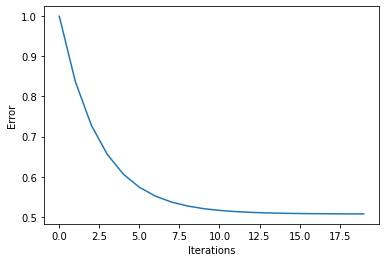

In [19]:
#plot the errors
import matplotlib.pyplot as plt
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()